In [1]:
library(rliger)
library(Seurat)
library(cluster)
library(MOFA2)
library(Signac)
library(umap)
seurat <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_seurat.rds")
mofa <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_mofa.rds")
liger <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_liger.rds")
mcia <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_mcia.rds")
icluster <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_icluster.rds")
tica <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_tica.rds")

Loading required package: cowplot

Loading required package: Matrix

Loading required package: patchwork


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject


Attaching package: ‘MOFA2’


The following object is masked from ‘package:stats’:

    predict




In [ ]:
# silhoutte

In [ ]:
## 未整合前
# RNA

In [2]:
seurat

An object of class Seurat 
709875 features across 378 samples within 3 assays 
Active assay: SCT (16668 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 5 dimensional reductions calculated: lsi, umap.atac, pca, umap.rna, wnn.umap

In [4]:
cluster <- samples_metadata(mofa)$orig.ident

In [5]:
distance.rna <- Embeddings(object = seurat[["umap.rna"]])
silhouette_rna <- silhouette(as.integer(as.factor(cluster)), dist(as.data.frame(distance.rna)))

In [6]:
summary(silhouette_rna)

Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(as.data.frame(distance.rna))) :
 Cluster sizes and average silhouette widths:
       96        91        95        96 
0.8572307 0.7911935 0.7924248 0.7527718 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.8758  0.8073  0.8508  0.7985  0.8834  0.9053 

In [7]:
sil.rna.sum <- data.frame(cluster = silhouette_rna[,"cluster"], score = silhouette_rna[,"sil_width"])
sil.rna.sum$method <- "RNA-seq"

In [ ]:
# ATAC

In [8]:
distance.atac <- Embeddings(object = seurat[["umap.atac"]])
silhouette_atac <- silhouette(as.integer(as.factor(cluster)), dist(as.data.frame(distance.atac)))
summary(silhouette_atac)

Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(as.data.frame(distance.atac))) :
 Cluster sizes and average silhouette widths:
         96          91          95          96 
-0.02307063  0.58863886  0.82158284  0.14214151 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.81345  0.03098  0.30256  0.37843  0.78558  0.85612 

In [9]:
sil.atac.sum <- data.frame(cluster = silhouette_atac[,"cluster"], score = silhouette_atac[,"sil_width"])
sil.atac.sum$method <- "ATAC-seq"

In [ ]:
# Seurat

In [10]:
distance.seurat <- Embeddings(object = seurat[["wnn.umap"]])
silhouette_seurat <- silhouette(as.integer(as.factor(cluster)), dist(as.data.frame(distance.seurat)))
summary(silhouette_seurat)
sil.seurat.sum <- data.frame(cluster = silhouette_seurat[,"cluster"], score = silhouette_seurat[,"sil_width"])
sil.seurat.sum$method <- "Seurat"

Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(as.data.frame(distance.seurat))) :
 Cluster sizes and average silhouette widths:
       96        91        95        96 
0.8473086 0.5785851 0.8270488 0.7811337 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.8142  0.7359  0.8177  0.7607  0.8552  0.8985 

In [ ]:
# mofa

In [12]:
mofa <- run_umap(mofa)

In [13]:
silhouette_mofa <- silhouette(as.integer(as.factor(cluster)), dist(mofa@dim_red$UMAP[,c(2,3)]))
summary(silhouette_mofa)
sil.mofa.sum <- data.frame(cluster = silhouette_mofa[,"cluster"], score = silhouette_mofa[,"sil_width"])
sil.mofa.sum$method <- "MOFA2"

Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(mofa@dim_red$UMAP[,  from     c(2, 3)])) :
 Cluster sizes and average silhouette widths:
         96          91          95          96 
 0.30966712  0.23324064  0.25975025 -0.02147098 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.51795  0.04807  0.25353  0.19462  0.47218  0.52910 

In [ ]:
# liger

In [8]:
library(cluster)

In [1]:
library(rliger)
liger <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_liger.rds")

Loading required package: cowplot

Loading required package: Matrix

Loading required package: patchwork


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [ ]:
# liger的embedding和降维
liger@H.norm
liger@tsne.coords

In [17]:
dim(liger@tsne.coords)

[1] 728   2

In [ ]:
# 展示icluster对细胞的分类
liger@clusters

In [ ]:
strsplit(rownames(liger@tsne.coords), "_")

In [ ]:
# 得到真实分类

In [2]:
cluster <- list()
list0 <- strsplit(rownames(liger@tsne.coords), "_")
for (i in c(1:728)){
    if (i <= 351){
        cluster[i] <- list0[[i]][1]
    }
    else {
        cluster[i] <- list0[[i]][2]
    }
}

In [3]:
liger <- quantile_norm(liger)
liger <- runUMAP(liger)

In [4]:
cluster_cell <- list()
for (i in c(1:728)){
    if (i <= 351){
        cluster_cell[i] <- "ATAC_seq"
    }
    else {
        cluster_cell[i] <- "RNA_seq"
    }
}

In [6]:
length(cluster_cell)

[1] 728

In [9]:
silhouette_liger_cell <- silhouette(as.integer(as.factor(as.character(cluster))), dist(liger@tsne.coords))
summary(silhouette_liger_cell)

Silhouette of 728 units in 5 clusters from silhouette.default(x = as.integer(as.factor(as.character(cluster))),  from     dist = dist(liger@tsne.coords)) :
 Cluster sizes and average silhouette widths:
        191         155         190         191           1 
-0.03278908 -0.51534282  0.52547597  0.58869386  0.00000000 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.9988 -0.1593  0.3760  0.1733  0.5940  0.6633 

In [77]:
head(silhouette_liger_cell)

cluster,neighbor,sil_width
2,4,-0.1833282
2,3,-0.3227769
2,3,-0.2045621
2,3,-0.2661756
2,3,-0.2154869
2,3,-0.1984578


In [10]:
sil.liger.sum <- data.frame(cluster = silhouette_liger_cell[,"cluster"], score = silhouette_liger_cell[,"sil_width"])
sil.liger.sum$method <- "LIGER"

In [21]:
silhouette_liger_batch <- silhouette(as.integer(as.factor(as.character(cluster_cell))), dist(liger@tsne.coords))
summary(silhouette_liger_batch)

Silhouette of 728 units in 2 clusters from silhouette.default(x = as.integer(as.factor(as.character(cluster_cell))),  from     dist = dist(liger@tsne.coords)) :
 Cluster sizes and average silhouette widths:
      351       377 
0.3549302 0.2216265 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.3440  0.2682  0.3266  0.2859  0.3965  0.5044 

In [22]:
# F1=2SILcell type (1 − SILbatch) / (1 − SILbatch + SILcell type)
F1 = 2 * silhouette_liger_cell[,"sil_width"] * (1 - silhouette_liger_batch[,"sil_width"]) / (1 - silhouette_liger_batch[,"sil_width"] + silhouette_liger_cell[,"sil_width"]) 

In [ ]:
silhouette_liger_cell

In [80]:
summary(F1)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1297.8610    -0.1325     0.5399    -2.0054     0.6576    51.8239 

In [25]:
silhouette_liger_F1 <- silhouette_liger_cell
silhouette_liger_F1[,"sil_width"] <- F1

In [27]:
sil.liger.sum <- data.frame(cluster = silhouette_liger_F1[,"cluster"], score = silhouette_liger_F1[,"sil_width"])
sil.liger.sum$method <- "LIGER"

In [35]:
head(sil.liger.sum)

,cluster,score,method
,<dbl>,<dbl>,<chr>
1,2,-0.5234939,LIGER
2,2,-1.2782107,LIGER
3,2,-0.6111234,LIGER
4,2,-0.9092301,LIGER
5,2,-0.6592883,LIGER
6,2,-0.5814859,LIGER


In [ ]:
#  mcia

In [16]:
factors_mcia <- mcia$mcoa$SynVar
umap_mcia <- umap(factors_mcia, metric="cosine")
umap_mcia_df <- data.frame(umap_mcia$layout)
silhouette_mcia <- silhouette(as.integer(as.factor(cluster)), dist(umap_mcia_df))
summary(silhouette_mcia)
sil.mcia.sum <- data.frame(cluster = silhouette_mcia[,"cluster"], score = silhouette_mcia[,"sil_width"])
sil.mcia.sum$method <- "MCIA"

Warning message:
“failed creating initial embedding; using random embedding instead”


Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(umap_mcia_df)) :
 Cluster sizes and average silhouette widths:
        96         91         95         96 
-0.2041523  0.8911282  0.9422867 -0.2436298 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.5469 -0.2510  0.1141  0.3376  0.9189  0.9571 

In [ ]:
# tICA

In [24]:
factors_tica <- as.matrix(tica$signals)
umap_tica <- umap(factors_tica, metric="cosine")
umap_tica_df <- data.frame(umap_tica$layout)
silhouette_tica <- silhouette(as.integer(as.factor(cluster)), dist(umap_tica_df))
summary(silhouette_tica)
sil.tica.sum <- data.frame(cluster = silhouette_tica[,"cluster"], score = silhouette_tica[,"sil_width"])
sil.tica.sum$method <- "tICA"

Warning message:
“failed creating initial embedding; using random embedding instead”


Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(umap_tica_df)) :
 Cluster sizes and average silhouette widths:
         96          91          95          96 
-0.04599547  0.83678319  0.87097037 -0.18004488 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.65017 -0.08263  0.23074  0.36294  0.86212  0.90360 

In [ ]:
# iCluster

In [25]:
umap_icluster <- umap(t(icluster$expZ), metric="cosine")
umap_icluster_df <- data.frame(umap_icluster$layout)
silhouette_icluster <- silhouette(as.integer(as.factor(cluster)), dist(umap_icluster_df))
summary(silhouette_icluster)
sil.icluster.sum <- data.frame(cluster = silhouette_icluster[,"cluster"], score = silhouette_icluster[,"sil_width"])
sil.icluster.sum$method <- "iCluster"

Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(umap_icluster_df)) :
 Cluster sizes and average silhouette widths:
         96          91          95          96 
 0.86692649 -0.07273676  0.35387899  0.46908171 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.7099  0.2150  0.4304  0.4107  0.7929  0.8967 

In [ ]:
# 综合分析

In [ ]:
library(tidyverse)
library(rstatix)
library(cluster)
library(ggplot2)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [27]:
silhouette_sum <- rbind(sil.rna.sum, sil.atac.sum, sil.seurat.sum, sil.mofa.sum, sil.liger.sum, sil.mcia.sum, sil.tica.sum, sil.icluster.sum)

In [12]:
silhouette_sum <- readRDS(file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_silhouette_sum.rds")

In [14]:
dim(silhouette_sum)

[1] 3024    3

In [15]:
silhouette_sum <- silhouette_sum[which(silhouette_sum$method != "LIGER"),]

In [16]:
dim(silhouette_sum)

[1] 2646    3

In [17]:
silhouette_sum <- rbind(silhouette_sum, sil.liger.sum)

In [18]:
# 定义绘图主题
theme_boxplot <- theme(panel.background = element_rect(fill = "white", colour = "black", size = 0.25),
      axis.line = element_line(colour = "black", size = 0.25),
      axis.title = element_text(size = 13, face = "plain", color = "black"),
      axis.text = element_text(size = 12,face = "plain", color = "black"),
      legend.position = "none",
      plot.title = element_text(hjust = 0.5))

In [19]:
silhouette_sum$method <- factor(silhouette_sum$method, levels = c("RNA-seq", "ATAC-seq", "Seurat", "MOFA2", "LIGER", "MCIA", "tICA", "iCluster"))

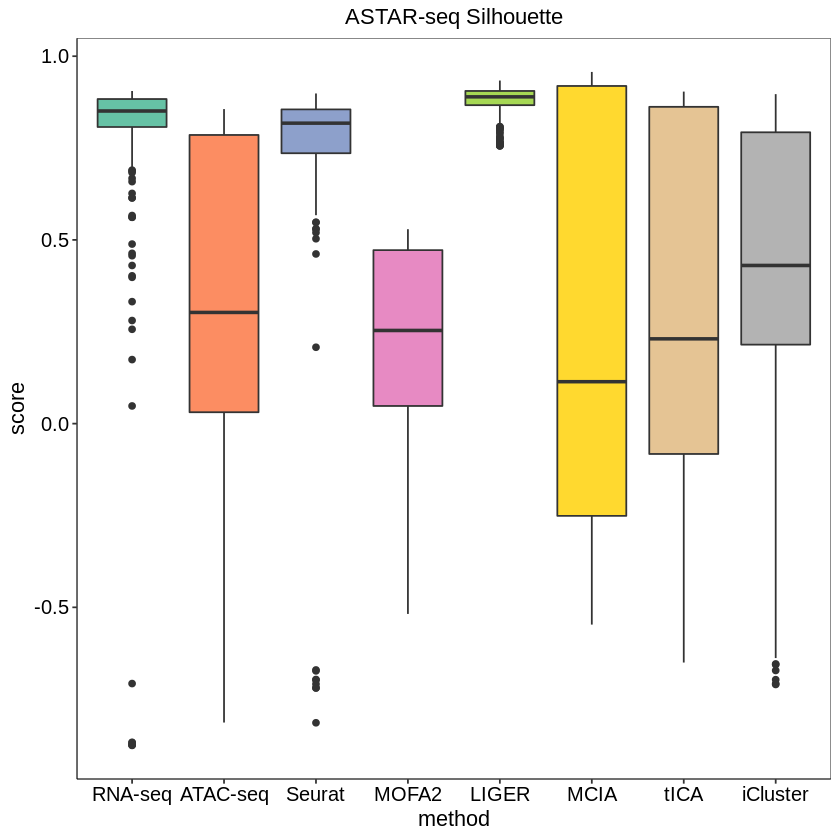

In [31]:
ggplot(silhouette_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot +  labs(title = "ASTAR-seq Silhouette")

In [32]:
jpeg(file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/snare_silhoutte.jpg", width = 7, height = 7, units = "in", res = 200)
ggplot(silhouette_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot +  labs(title = "ASTAR-seq Silhouette")
dev.off()

png 
  2

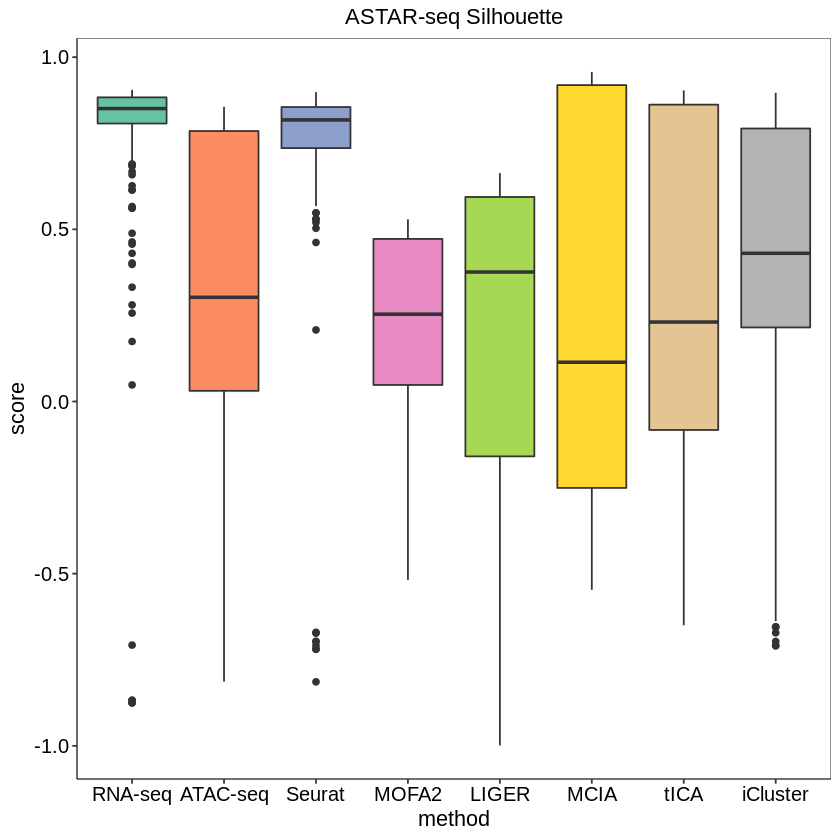

In [20]:
# 改变LIGER为所有细胞类型计算后
ggplot(silhouette_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot +  labs(title = "ASTAR-seq Silhouette")

In [33]:
# 改变LIGER为F1计算后
silhouette_sum <- silhouette_sum[which(silhouette_sum$method != "LIGER"),]

In [ ]:
silhouette_sum <- rbind(silhouette_sum, sil.liger.sum)
silhouette_sum$method <- factor(silhouette_sum$method, levels = c("RNA-seq", "ATAC-seq", "Seurat", "MOFA2", "LIGER", "MCIA", "tICA", "iCluster"))

In [34]:
dim(silhouette_sum)

[1] 2646    3

In [ ]:
# 删除一些过大偏差的值

In [36]:
x <- sil.liger.sum$score[!sil.liger.sum$score %in% boxplot.stats(sil.liger.sum$score)$out]

In [38]:
head(sil.liger.sum)

,cluster,score,method
,<dbl>,<dbl>,<chr>
1,2,-0.5234939,LIGER
2,2,-1.2782107,LIGER
3,2,-0.6111234,LIGER
4,2,-0.9092301,LIGER
5,2,-0.6592883,LIGER
6,2,-0.5814859,LIGER


In [37]:
length(sil.liger.sum$score)
length(x)

[1] 728

[1] 626

In [40]:
sil.liger.sum0 <- sil.liger.sum[1:626,]
sil.liger.sum0$score <- x
silhouette_sum <- silhouette_sum[which(silhouette_sum$method != "LIGER"),]
silhouette_sum <- rbind(silhouette_sum, sil.liger.sum0)
silhouette_sum$method <- factor(silhouette_sum$method, levels = c("RNA-seq", "ATAC-seq", "Seurat", "MOFA2", "LIGER", "MCIA", "tICA", "iCluster"))

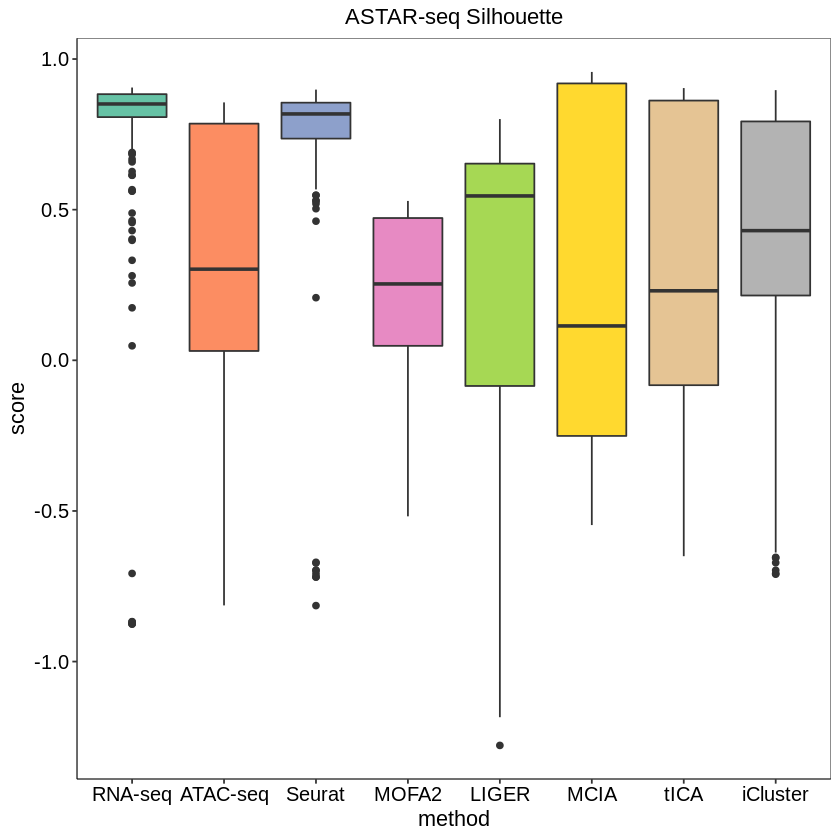

In [41]:
ggplot(silhouette_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot +  labs(title = "ASTAR-seq Silhouette")

In [70]:
saveRDS(silhouette_sum, file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_silhouette_sum.rds")

In [ ]:
## 逆辛普森指数

In [43]:
library(lisi)

In [35]:
clusters <- data.frame(label1 = as.integer(as.factor(cluster)))

In [ ]:
# RNA

In [36]:
lisi_rna <- compute_lisi(distance.rna, clusters, c('label1'))
lisi_rna[,2] <- "RNA-seq"
colnames(lisi_rna) <- c("score", "method")
lisi_rna$cluster <- clusters$label1
mean(lisi_rna[,1])
median(lisi_rna[,1])

[1] 1.060435

[1] 1

In [37]:
# ATAC
lisi_atac <- compute_lisi(distance.atac, clusters, c('label1'))
lisi_atac[,2] <- "ATAC-seq"
colnames(lisi_atac) <- c("score", "method")
lisi_atac$cluster <- clusters$label1
mean(lisi_atac[,1])
median(lisi_atac[,1])

[1] 1.214537

[1] 1.099768

In [38]:
# Seurat
lisi_seurat <- compute_lisi(as.data.frame(distance.seurat), clusters, c('label1'))
lisi_seurat[,2] <- "Seurat"
colnames(lisi_seurat) <- c("score", "method")
lisi_seurat$cluster <- clusters$label1
mean(lisi_seurat[,1])
median(lisi_seurat[,1])

[1] 1.027929

[1] 1

In [39]:
# mofa
lisi_mofa <- compute_lisi(mofa@dim_red$UMAP[,c(2,3)], clusters, c('label1'))
lisi_mofa[,2] <- "MOFA2"
colnames(lisi_mofa) <- c("score", "method")
lisi_mofa$cluster <- clusters$label1
mean(lisi_mofa[,1])
median(lisi_mofa[,1])

[1] 1.369382

[1] 1.313347

In [41]:
# liger
lisi_liger <- compute_lisi(liger@tsne.coords[351:728,], clusters, c('label1'))
lisi_liger[,2] <- "LIGER"
colnames(lisi_liger) <- c("score", "method")
lisi_liger$cluster <- clusters$label1
mean(lisi_liger[,1])
median(lisi_liger[,1])

[1] 1

[1] 1

In [50]:
clusters <- data.frame(label1 = as.integer(as.factor(as.character(cluster))))

In [51]:
# liger
lisi_liger <- compute_lisi(liger@tsne.coords, clusters, c('label1'))
lisi_liger[,2] <- "LIGER"
colnames(lisi_liger) <- c("score", "method")
lisi_liger$cluster <- clusters$label1
mean(lisi_liger[,1])
median(lisi_liger[,1])

[1] 1.033314

[1] 1

In [52]:
head(lisi_liger)

,score,method,cluster
,<dbl>,<chr>,<int>
1,1.000040,LIGER,2
2,1.120934,LIGER,2
3,1.000049,LIGER,2
4,1.014975,LIGER,2
5,1.000198,LIGER,2
6,1.000184,LIGER,2


In [53]:
clusters_cell <- data.frame(label1 = as.integer(as.factor(as.character(cluster_cell))))

In [61]:
# liger batch
lisi_liger_score <- compute_lisi(liger@tsne.coords, clusters_cell, c('label1'))

In [58]:
summary(lisi_liger0)

     label1     
 Min.   :1.000  
 1st Qu.:1.000  
 Median :1.000  
 Mean   :1.004  
 3rd Qu.:1.000  
 Max.   :1.205  

In [65]:
lisi_liger0 <- lisi_liger
# F1=2SILcell type (1 − SILbatch) / (1 − SILbatch + SILcell type)
F1 = 2 * lisi_liger$score * (1 - lisi_liger_score$label1) / (1 - lisi_liger_score$label1 + lisi_liger$score)
lisi_liger0$score <- F1
mean(lisi_liger0[,1])
median(lisi_liger0[,1])

[1] -0.009460573

[1] 0

In [67]:
summary(F1)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.4947622 -0.0000002  0.0000000 -0.0094606  0.0000000  0.0000000 

In [42]:
# mcia
lisi_mcia <- compute_lisi(umap_mcia_df, clusters, c('label1'))
lisi_mcia[,2] <- "MCIA"
colnames(lisi_mcia) <- c("score", "method")
lisi_mcia$cluster <- clusters$label1
mean(lisi_mcia[,1])
median(lisi_mcia[,1])

[1] 1.191205

[1] 1.137981

In [43]:
# tICA
lisi_tica <- compute_lisi(umap_tica_df, clusters, c('label1'))
lisi_tica[,2] <- "tICA"
colnames(lisi_tica) <- c("score", "method")
lisi_tica$cluster <- clusters$label1
mean(lisi_tica[,1])
median(lisi_tica[,1])

[1] 1.232137

[1] 1.121605

In [44]:
# iCluster
lisi_icluster <- compute_lisi(umap_icluster_df, clusters, c('label1'))
lisi_icluster[,2] <- "iCluster"
colnames(lisi_icluster) <- c("score", "method")
lisi_icluster$cluster <- clusters$label1
mean(lisi_icluster[,1])
median(lisi_icluster[,1])

[1] 1.30297

[1] 1.17107

In [45]:
lisi_sum <- rbind(lisi_rna, lisi_atac, lisi_seurat, lisi_mofa, lisi_liger, lisi_mcia, lisi_tica, lisi_icluster)

In [46]:
lisi_sum$method <- factor(lisi_sum$method, levels = c("RNA-seq", "ATAC-seq", "Seurat", "MOFA2", "LIGER", "MCIA", "tICA", "iCluster"))

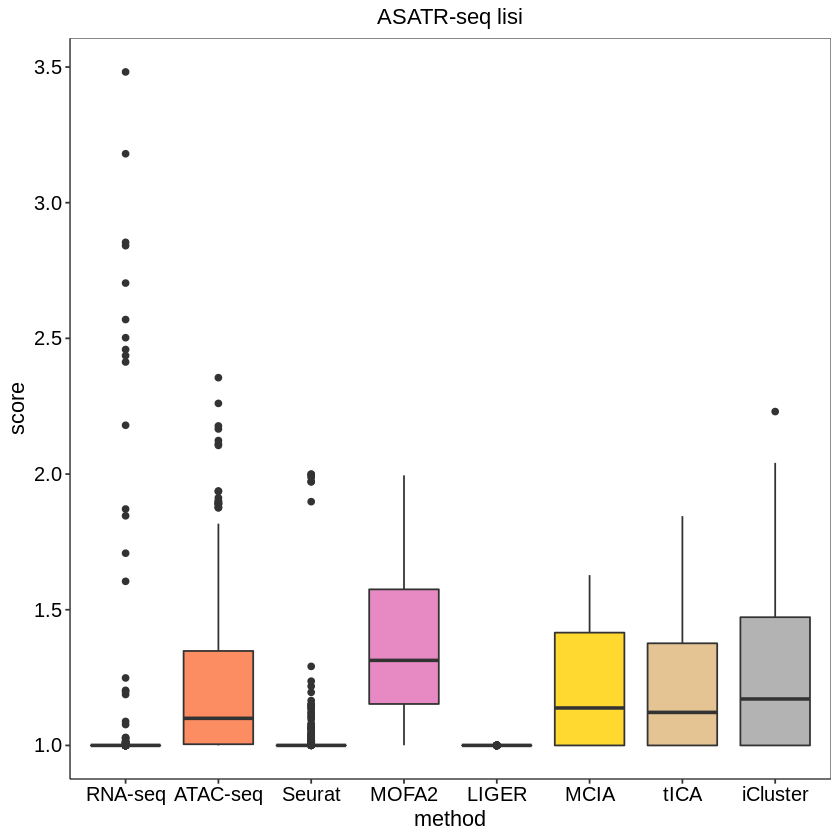

In [47]:
ggplot(lisi_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot + labs(title = "ASATR-seq lisi")

In [48]:
jpeg(file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_lisi.jpg", width = 7, height = 7, units = "in", res = 200)
ggplot(lisi_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot + labs(title = "ASATR-seq lisi")
dev.off()

png 
  2

In [49]:
saveRDS(lisi_sum, file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_lisi_sum.rds")

In [54]:
lisi_sum <- readRDS(file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_lisi_sum.rds")

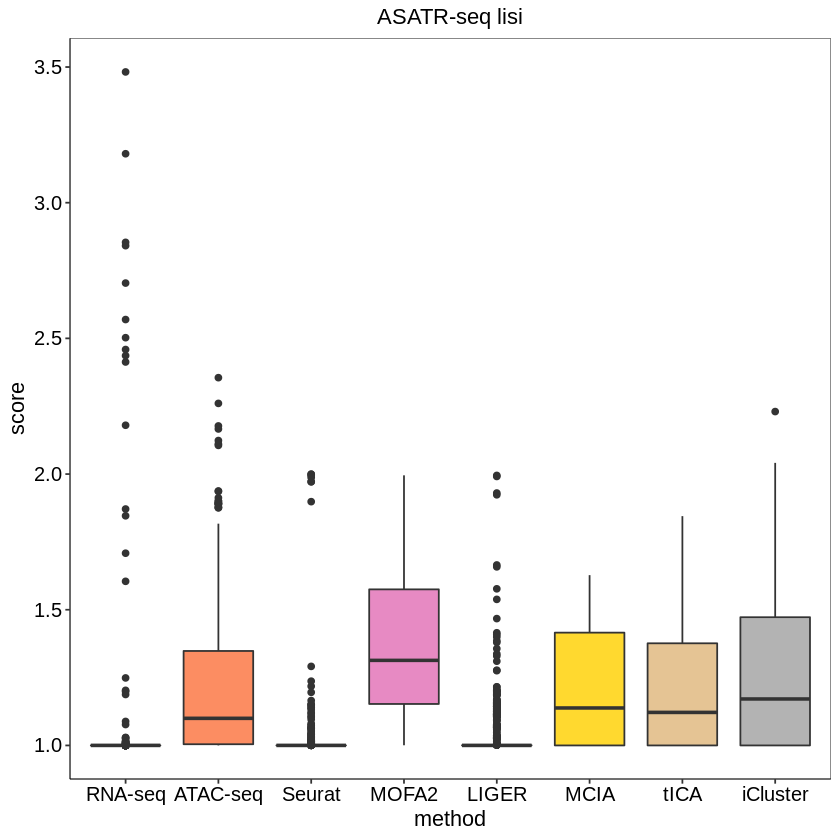

In [68]:
lisi_sum <- lisi_sum[which(lisi_sum$method != "LIGER"),]
lisi_sum <- rbind(lisi_sum, lisi_liger)
lisi_sum$method <- factor(lisi_sum$method, levels = c("RNA-seq", "ATAC-seq", "Seurat", "MOFA2", "LIGER", "MCIA", "tICA", "iCluster"))
ggplot(lisi_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot + labs(title = "ASATR-seq lisi")

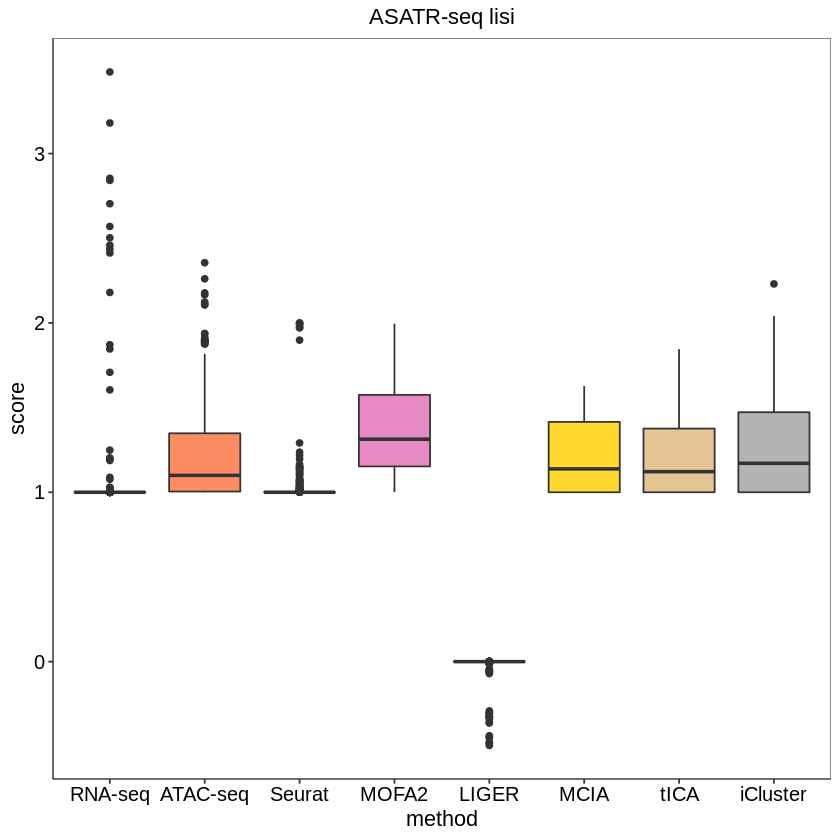

In [66]:
# liger F1 score
lisi_sum <- lisi_sum[which(lisi_sum$method != "LIGER"),]
lisi_sum <- rbind(lisi_sum, lisi_liger0)
lisi_sum$method <- factor(lisi_sum$method, levels = c("RNA-seq", "ATAC-seq", "Seurat", "MOFA2", "LIGER", "MCIA", "tICA", "iCluster"))
ggplot(lisi_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot + labs(title = "ASATR-seq lisi")

In [69]:
saveRDS(lisi_sum, file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_lisi_sum.rds")